<a href="https://colab.research.google.com/github/hagy2/amazon-task/blob/main/amazontask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

!pip install dash plotly

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px


In [ ]:
!pip install pandas matplotlib seaborn dash plotly


In [65]:
file = '/content/Amazon Sale Report.csv'
df = pd.read_csv(file)


df.head()
print(df.info())
print("-------------------------------------------")
print(df.isnull().sum())
print("----------------------------------------------")
print(df.dtypes)

<ipython-input-65-faf32c74b0ef>:2: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

               index            Qty         Amount  ship-postal-code
count  128975.000000  128975.000000  121180.000000     128942.000000
mean    64487.000000       0.904431     648.561465     463966.236509
std     37232.019822       0.313354     281.211687     191476.764941
min         0.000000       0.000000       0.000000     110001.000000
25%     32243.500000       1.000000     449.000000     382421.000000
50%     64487.000000       1.000000     605.000000     500033.000000
75%     96730.500000       1.000000     788.000000     600024.000000
max    128974.000000      15.000000    5584.000000     989898.000000
---------------------------------------------------
                   Order ID      Date   Status Fulfilment Sales Channel   \
count                128975    128975   128975     128975         128975   
unique               120378        91       13          2              2   
top     171-5057375-2831560  05-03-22  Shipped     Amazon      Amazon.in   
freq                   

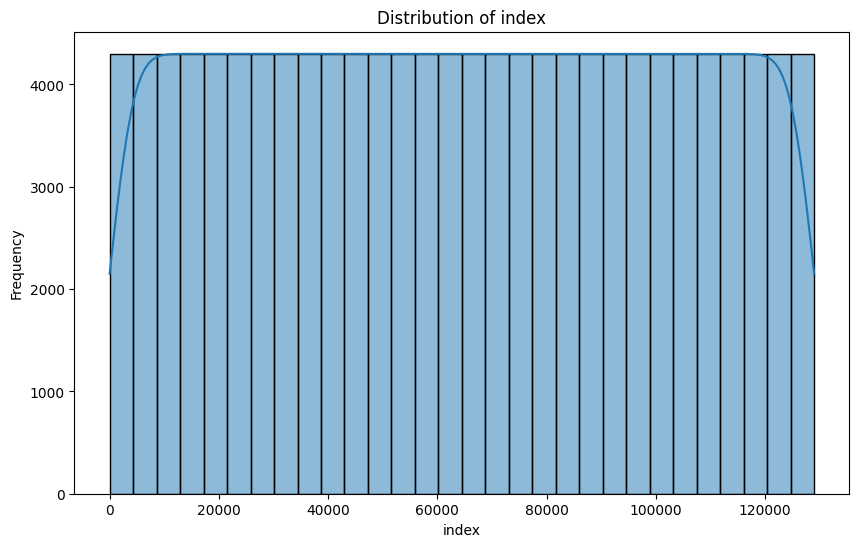

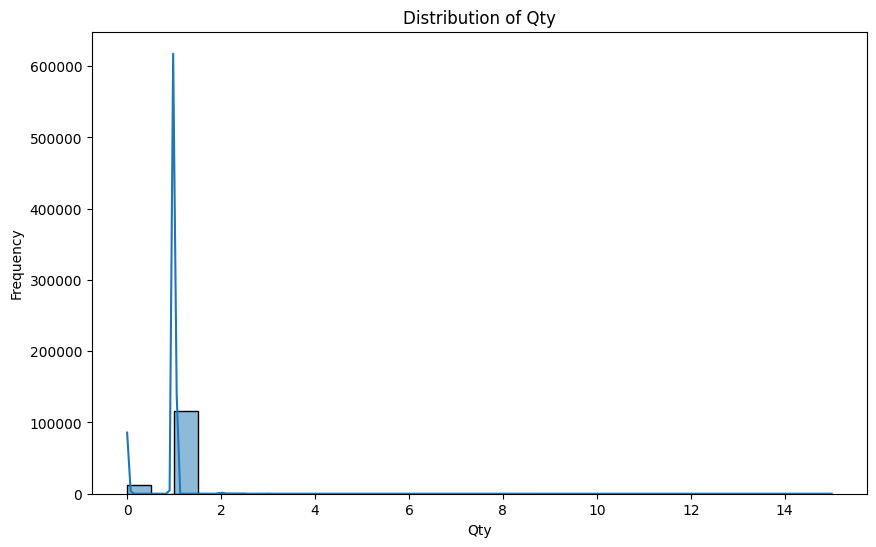

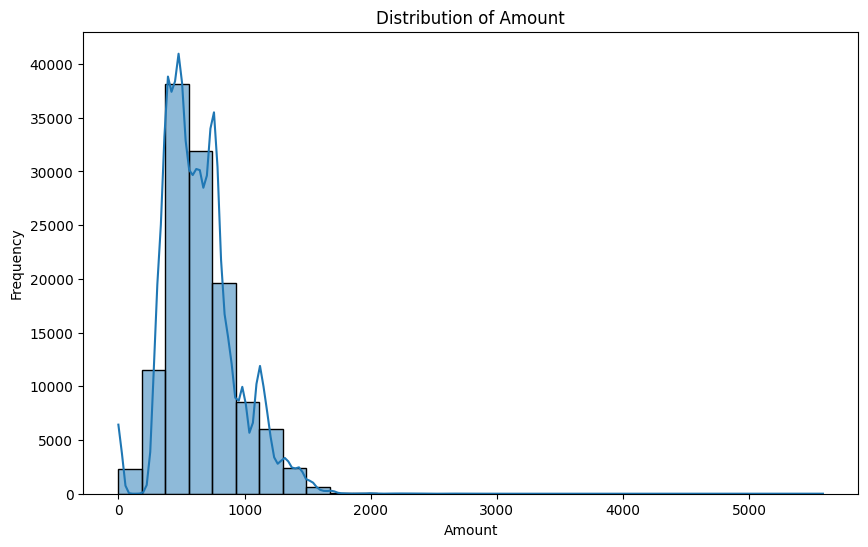

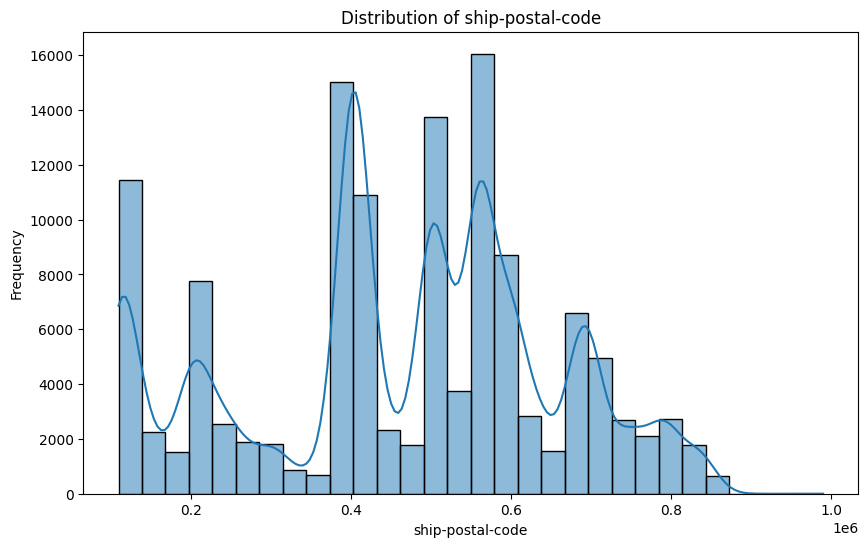

In [66]:
print(df.describe())
print("---------------------------------------------------")
# Generate summary statistics for categorical variables
print(df.describe(include=['object','bool']))




# Visualize

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [67]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



# Handle missing values

df['Amount'].fillna(df['Amount'].median(), inplace=True)
df.dropna(subset=['Status'], inplace=True)
df['Courier Status'].fillna(df['Courier Status'].mode()[0], inplace=True)
df['currency'].fillna(df['currency'].mode()[0], inplace=True)
df['Amount'].fillna(df['Amount'].median(), inplace=True)

# Dropping columns with too many missing values
columns_to_drop = [col for col in ['fulfilled-by', 'Unnamed: 22', 'promotion-ids'] if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

# Converting 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

# Summary statistics
numerical_summary_after = df.describe()
categorical_summary_after = df.describe(include=['object', 'bool'])

numerical_summary_after, categorical_summary_after

Courier Status       6872
currency             7795
Amount               7795
ship-city              33
ship-state             33
ship-postal-code       33
ship-country           33
promotion-ids       49153
fulfilled-by        89698
Unnamed: 22         49050
dtype: int64


(               index                           Date            Qty  \
 count  128975.000000                         128975  128975.000000   
 mean    64487.000000  2022-05-12 11:49:27.951928576       0.904431   
 min         0.000000            2022-03-31 00:00:00       0.000000   
 25%     32243.500000            2022-04-20 00:00:00       1.000000   
 50%     64487.000000            2022-05-10 00:00:00       1.000000   
 75%     96730.500000            2022-06-04 00:00:00       1.000000   
 max    128974.000000            2022-06-29 00:00:00      15.000000   
 std     37232.019822                            NaN       0.313354   
 
               Amount  ship-postal-code  
 count  128975.000000     128942.000000  
 mean      645.928694     463966.236509  
 min         0.000000     110001.000000  
 25%       459.000000     382421.000000  
 50%       605.000000     500033.000000  
 75%       771.000000     600024.000000  
 max      5584.000000     989898.000000  
 std       272.778829  

In [68]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      128975 non-null  object        
 13  Qty                 128975 no

In [69]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound
for col in numerical_columns:
    # Detect outliers
  outliers, lower_bound, upper_bound = detect_outliers(df, col)

    # Print outliers
  print(f"Outliers in {col}:")
  print(outliers[[col]])
  print("\n")
for col in numerical_columns:
    # Detecting outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR



    # Treat outliers by capping the values within the bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


Outliers in index:
Empty DataFrame
Columns: [index]
Index: []


Outliers in Qty:
        Qty
0         0
3         0
8         0
23        0
29        0
...     ...
128907    0
128908    0
128956    2
128958    0
128967    0

[13195 rows x 1 columns]


Outliers in Amount:
         Amount
80      1281.00
102     1338.00
146     1399.00
226     1249.11
243     1338.00
...         ...
128811  1399.00
128846  1364.00
128873  1523.00
128911  1349.00
128957  1349.00

[4177 rows x 1 columns]


Outliers in ship-postal-code:
       ship-postal-code
4903           989898.0
45187          959121.0
64618          984196.0




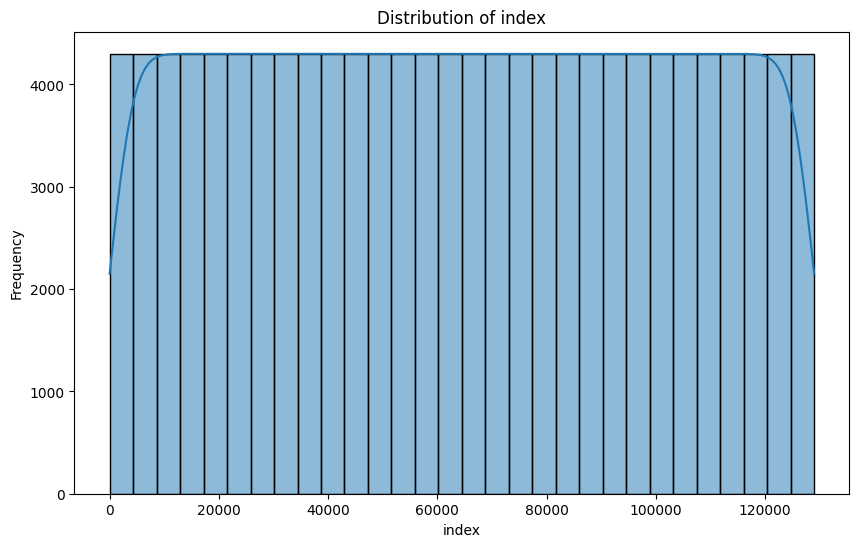

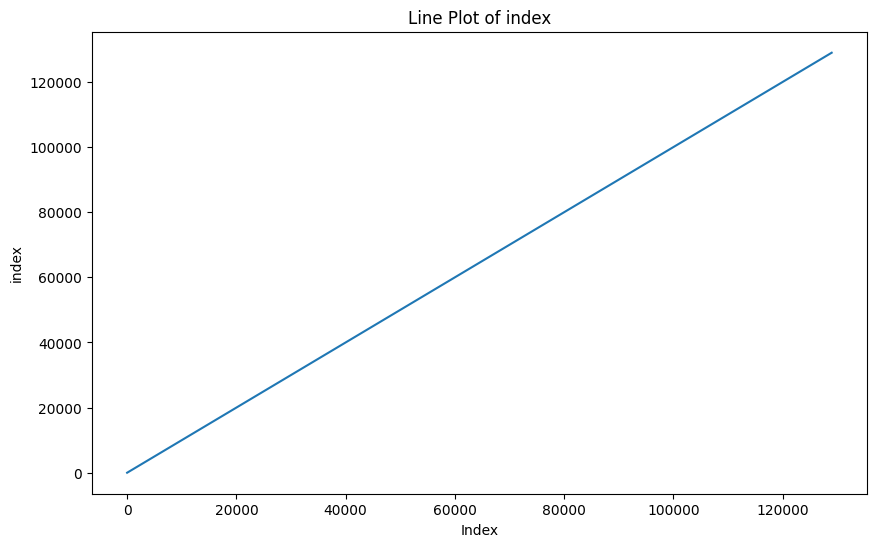

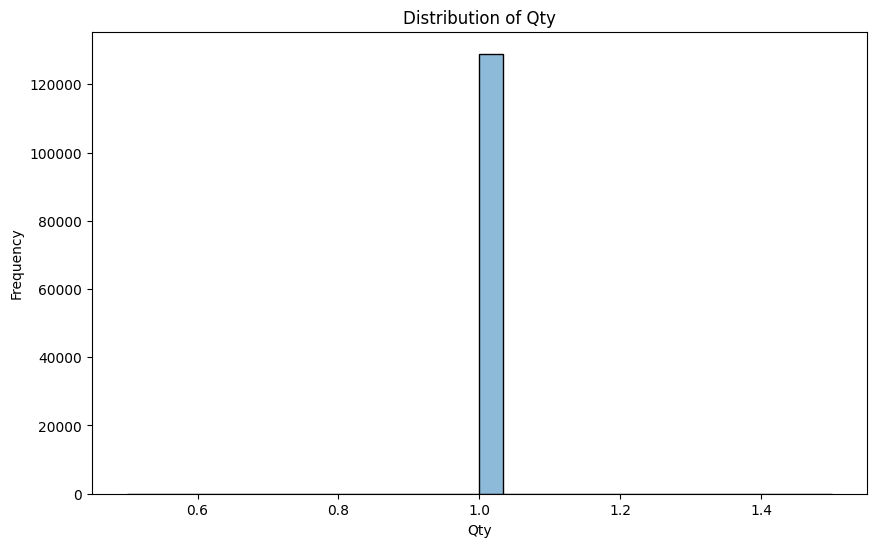

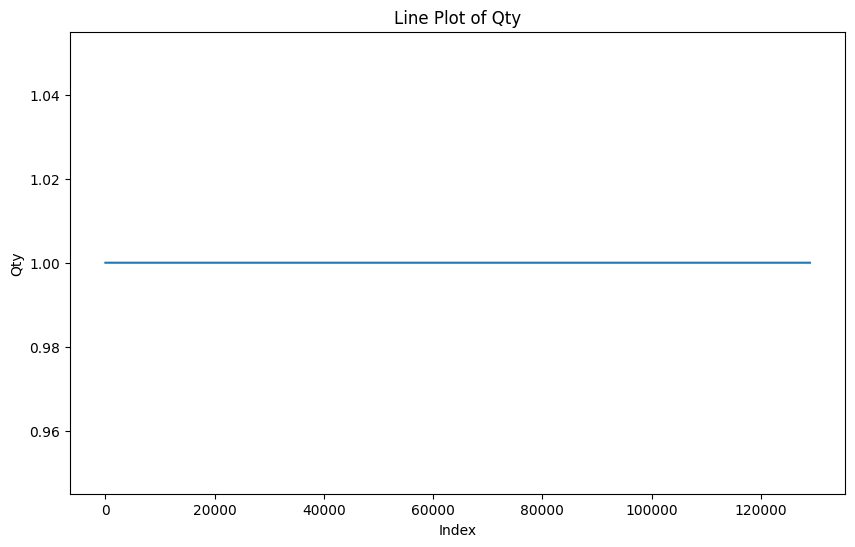

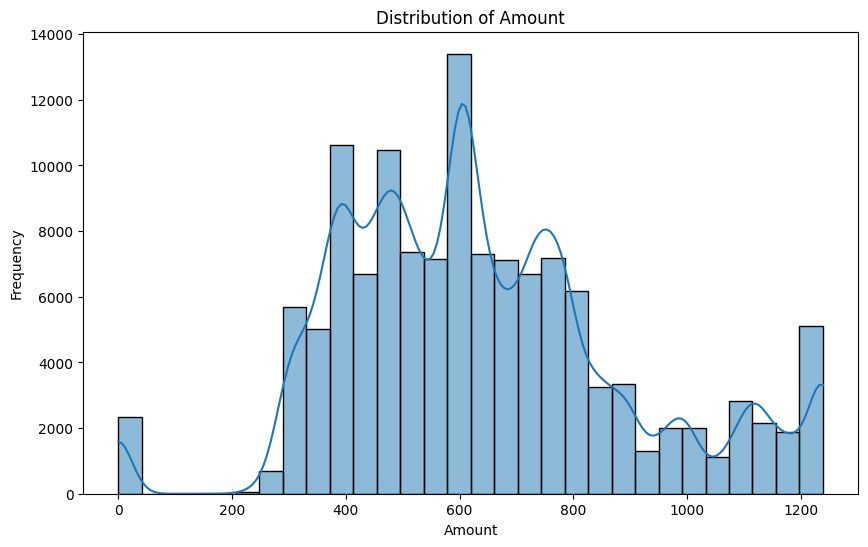

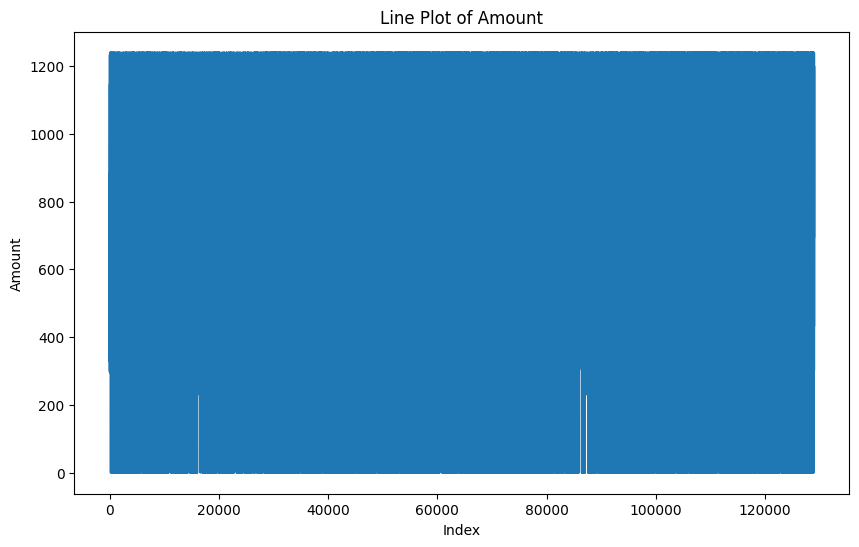

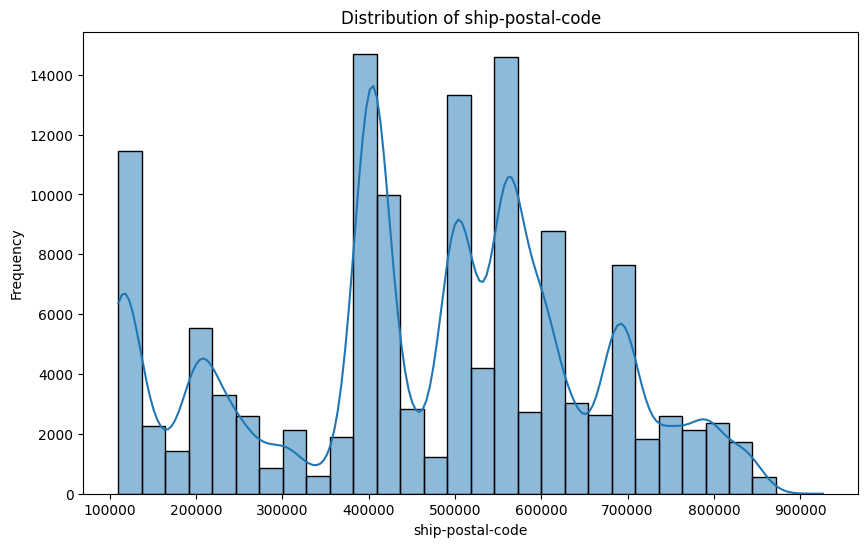

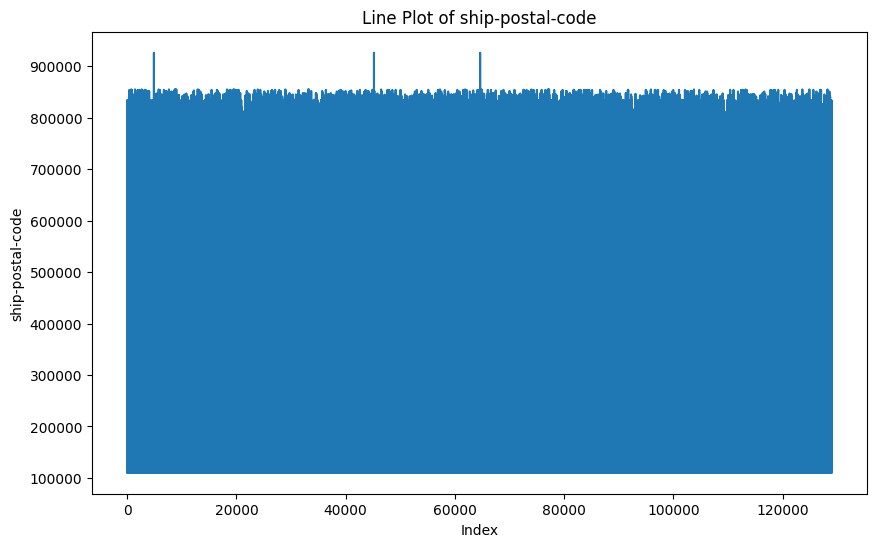

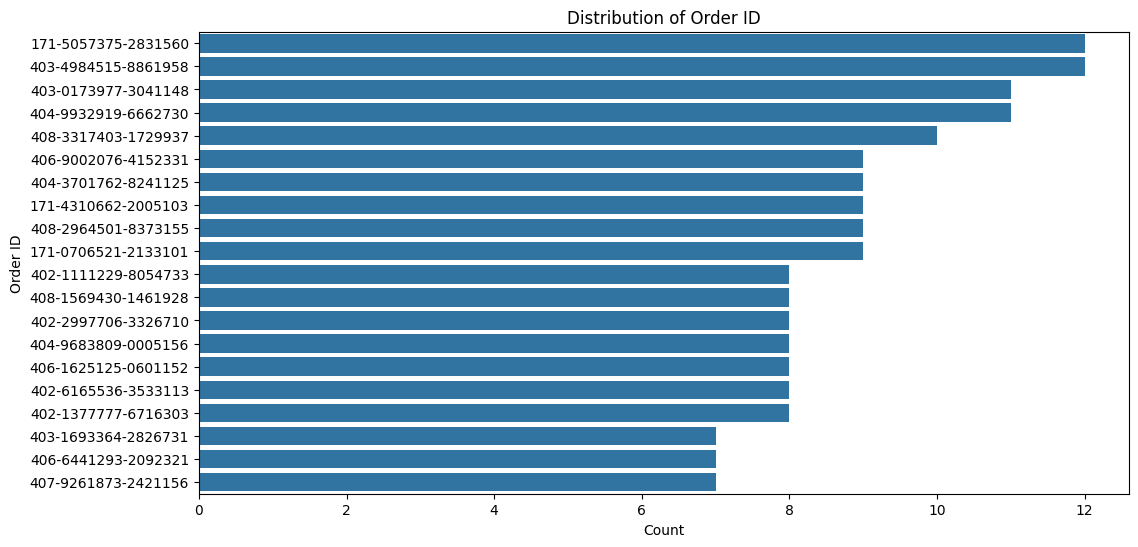

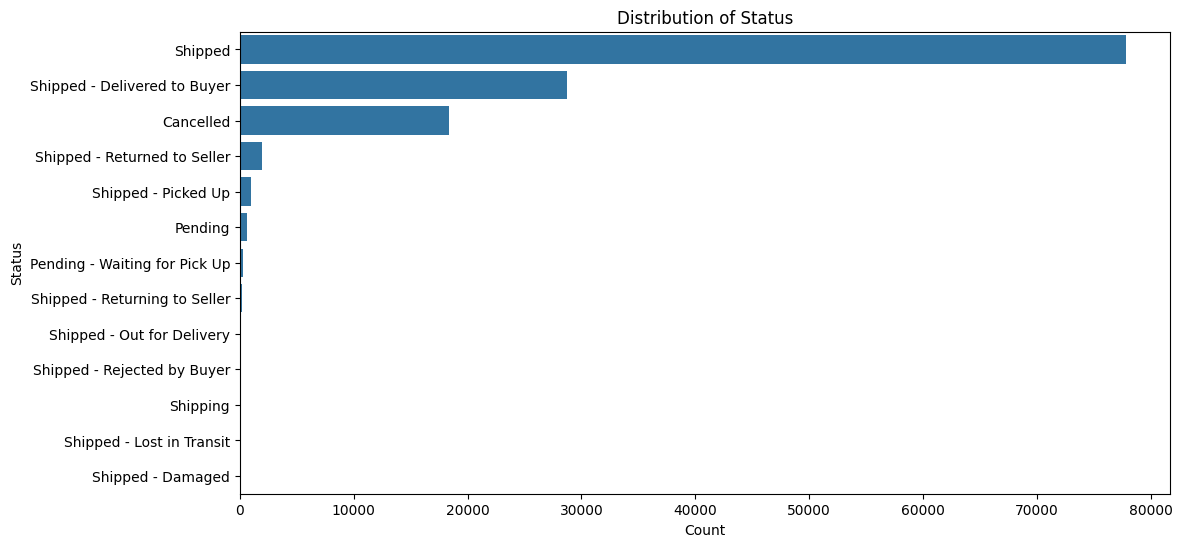

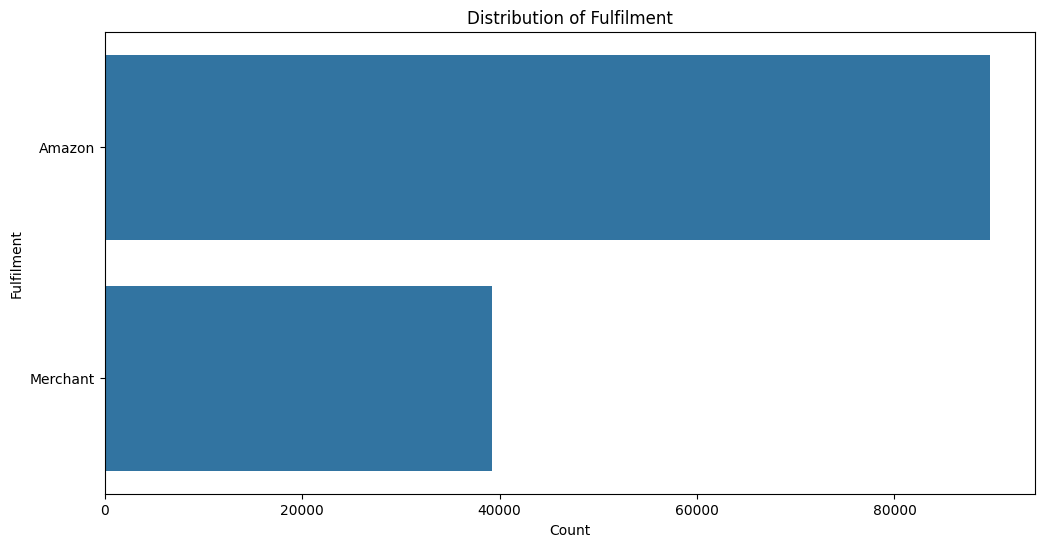

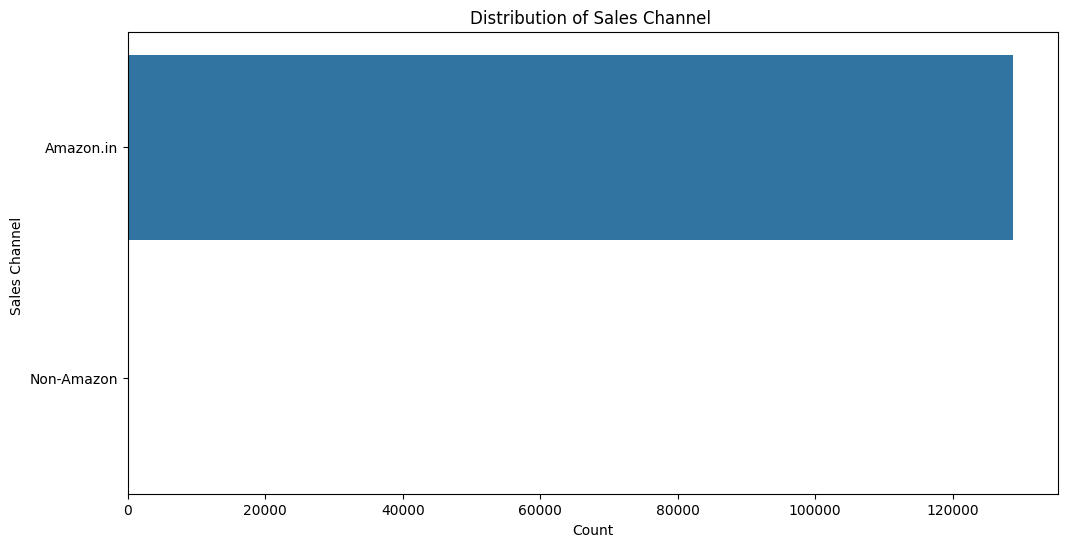

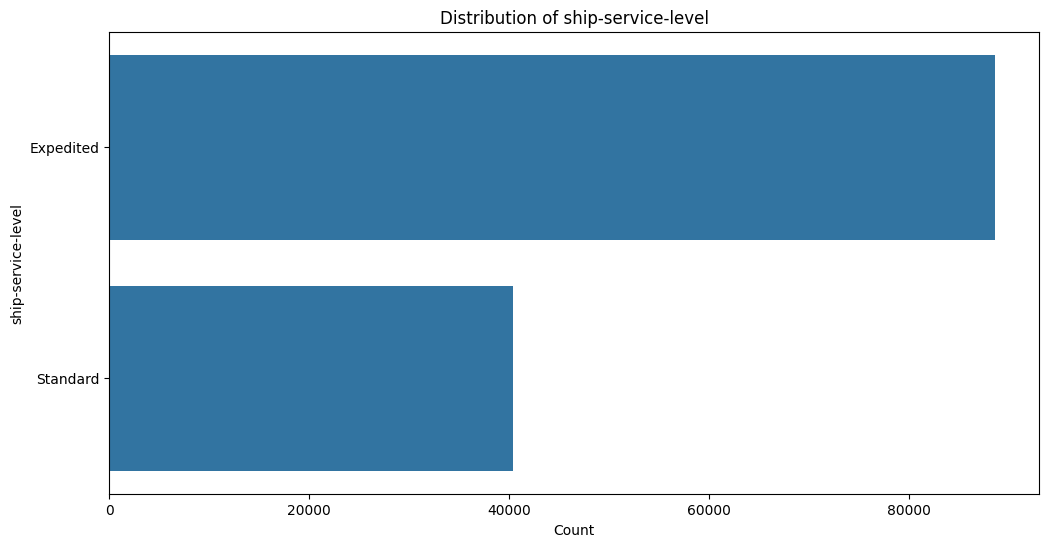

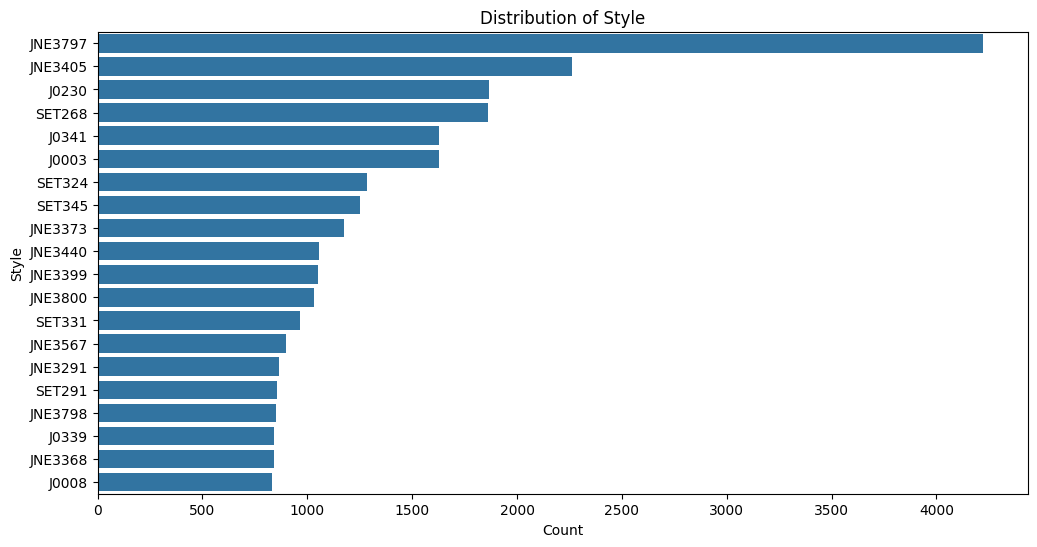

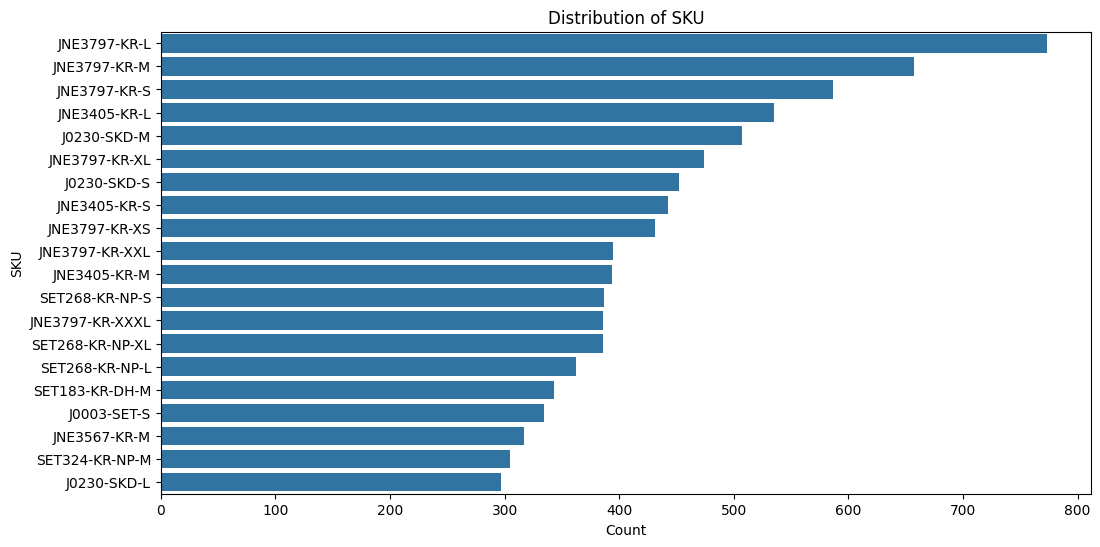

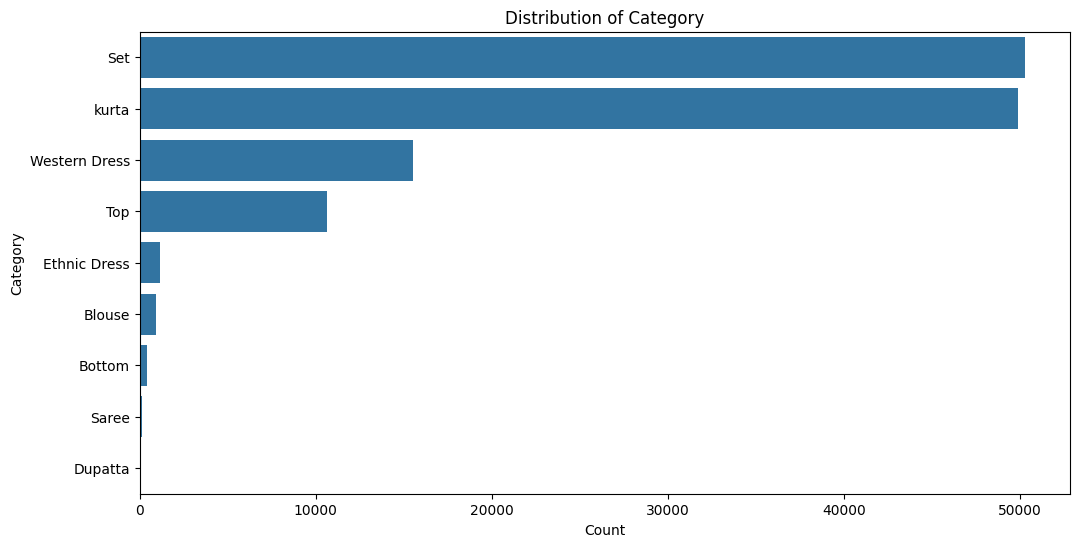

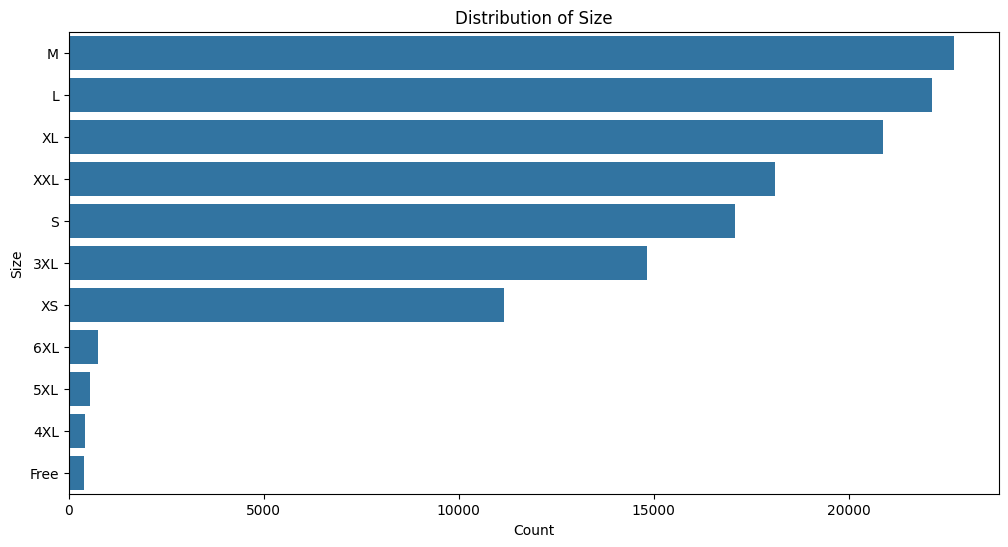

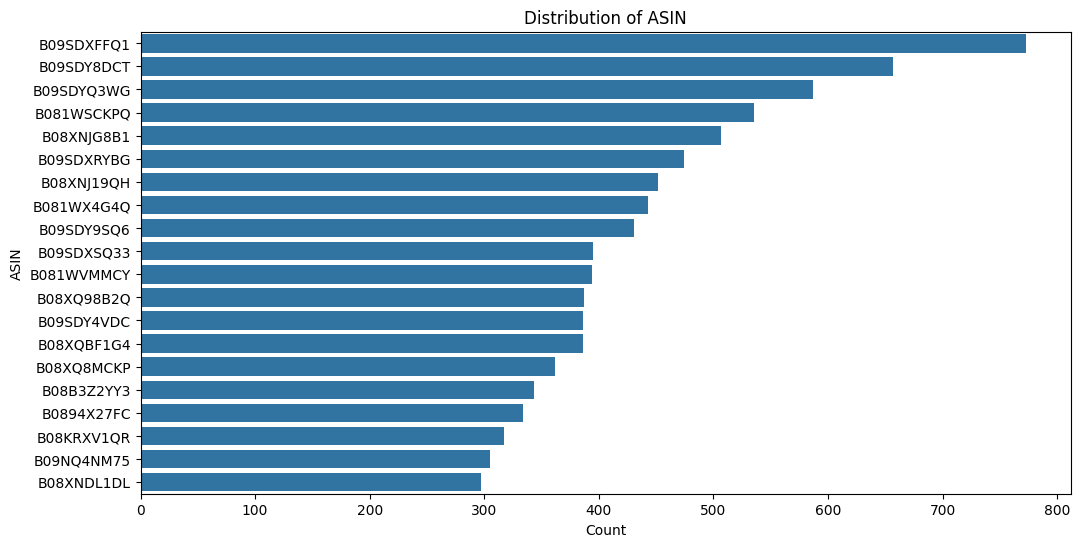

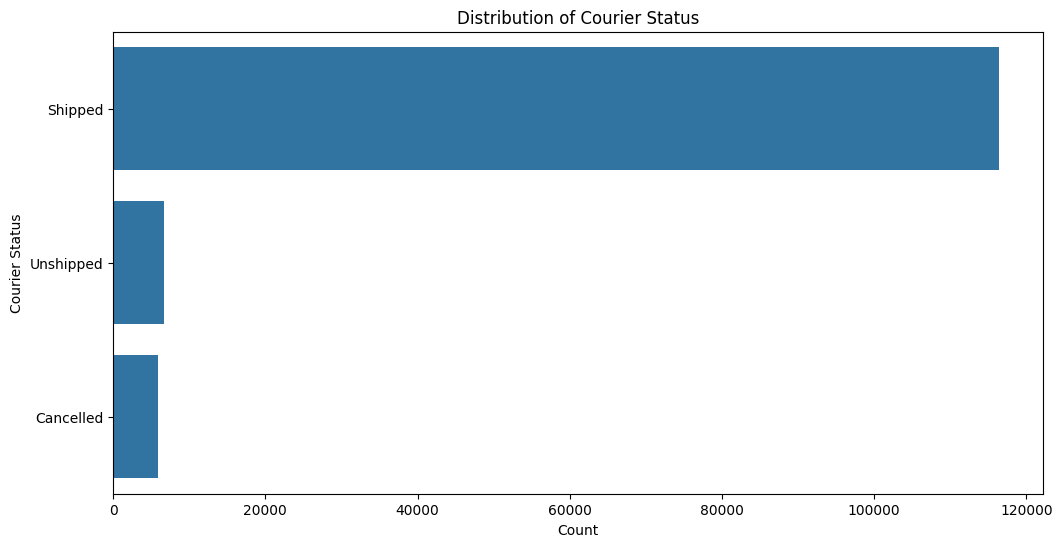

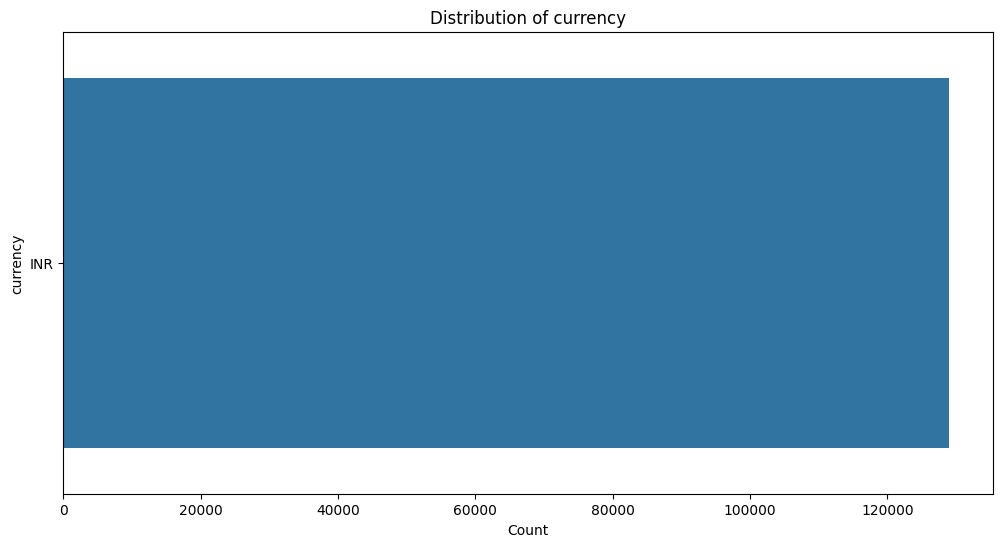

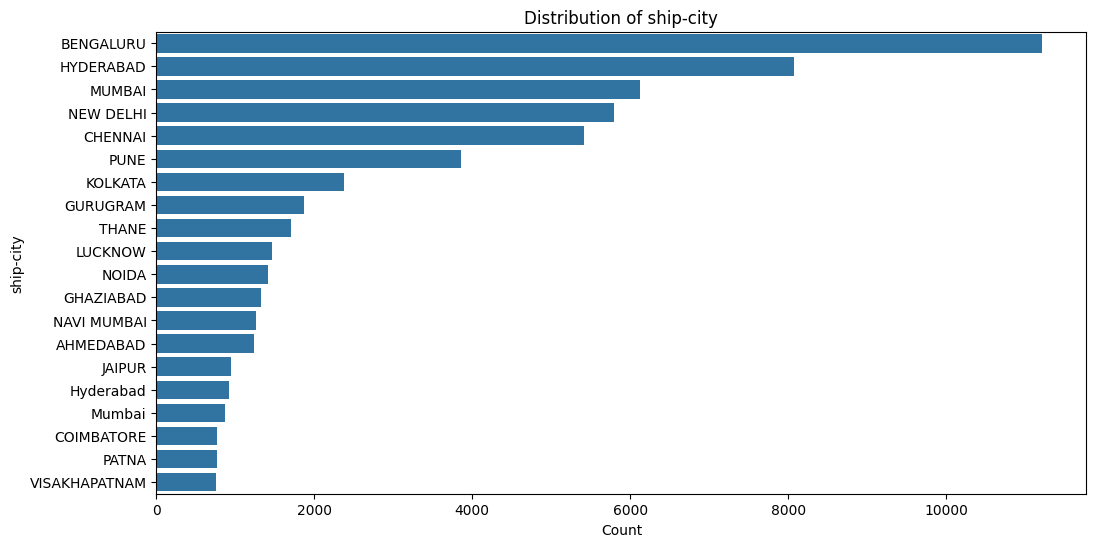

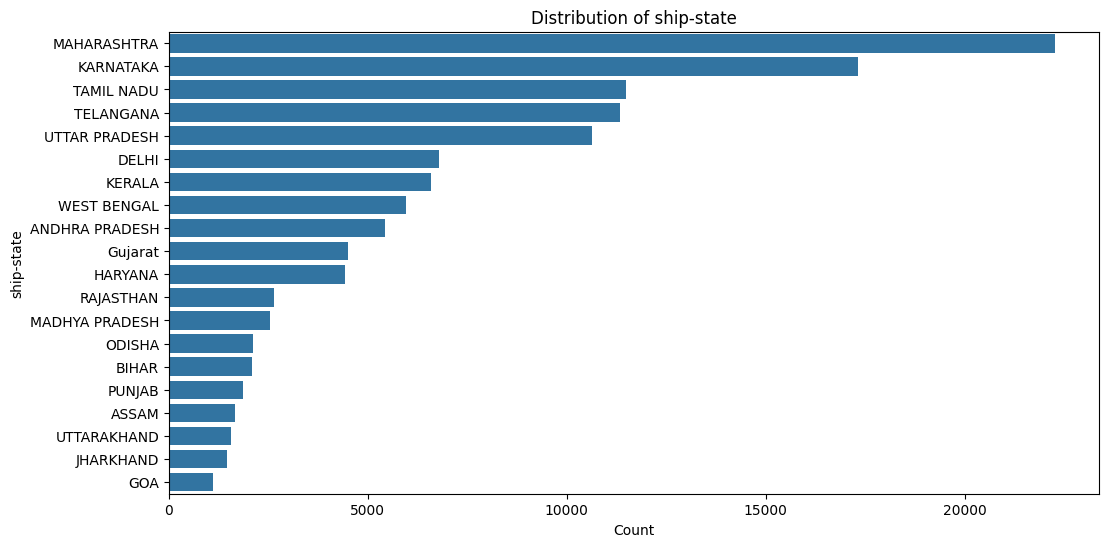

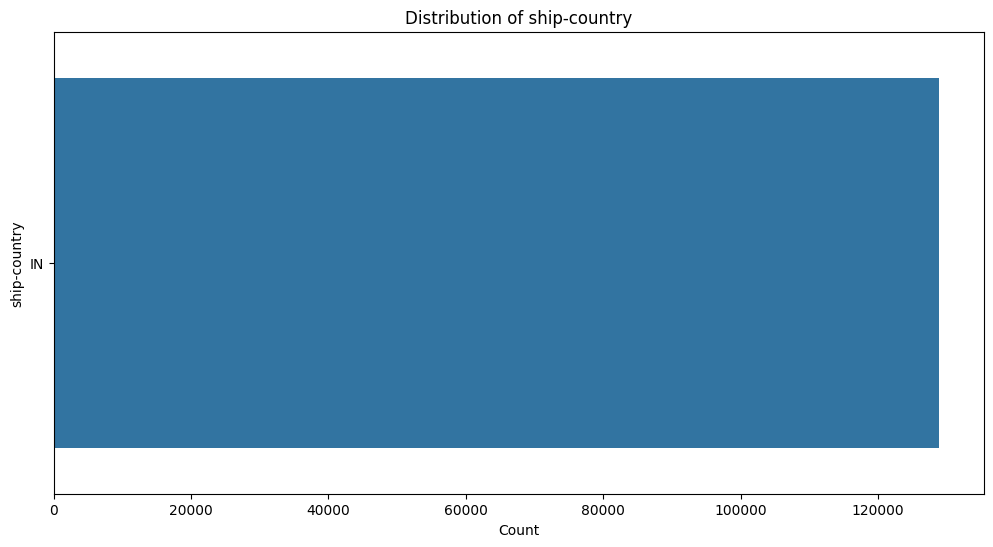

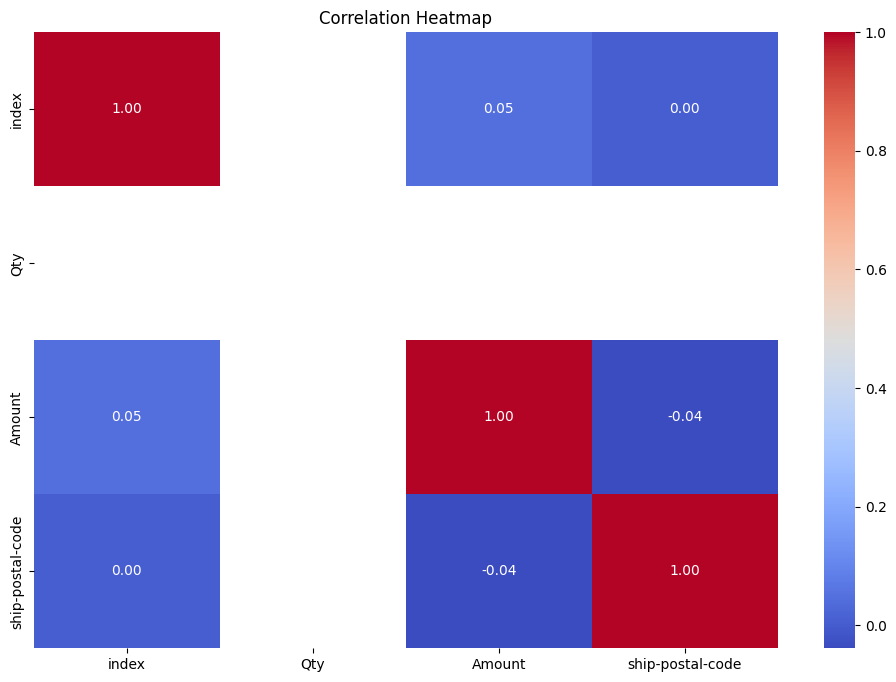

In [70]:
def visualize_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df, x=df.index, y=col)
        plt.title(f'Line Plot of {col}')
        plt.xlabel('Index')
        plt.ylabel(col)
        plt.show()

# Function to visualize categorical columns with bar plots
def visualize_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        # Limit the number of categories displayed
        top_categories = df[col].value_counts().head(20).index
        df_filtered = df[df[col].isin(top_categories)]

        plt.figure(figsize=(12, 6))
        sns.countplot(y=col, data=df_filtered, order=top_categories)
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

# Function to create a heatmap of correlations
def visualize_heatmap(df):
    plt.figure(figsize=(12, 8))
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    corr_matrix = numerical_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

# Visualize numerical columns
visualize_numerical_columns(df)

# Visualize categorical columns
visualize_categorical_columns(df)

# Visualize correlation heatmap
visualize_heatmap(df)


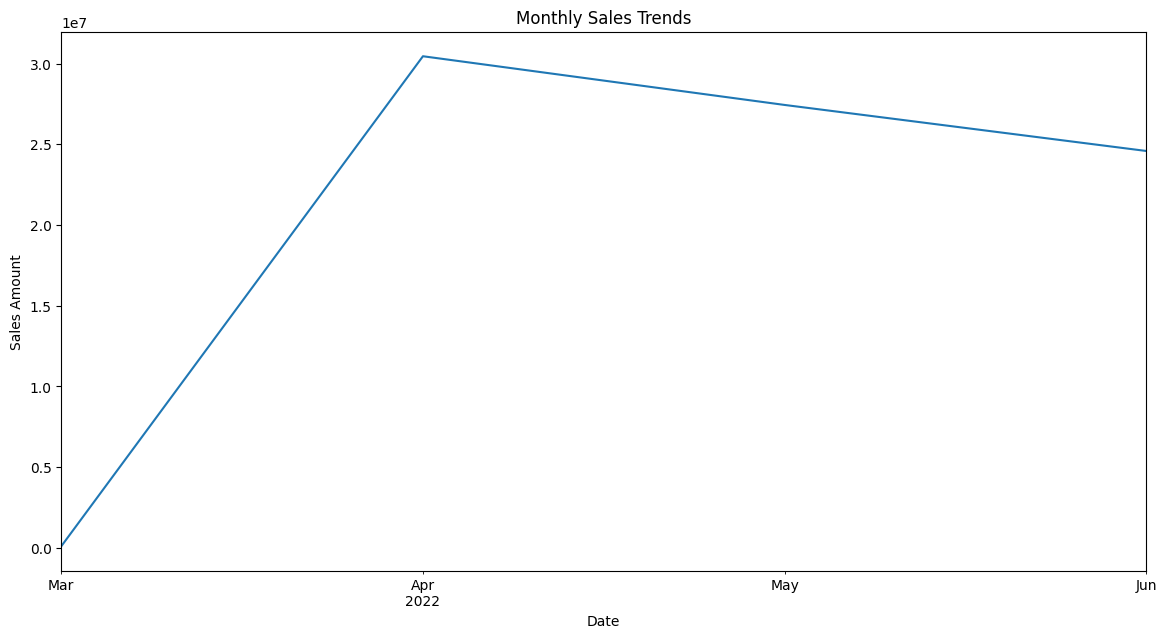

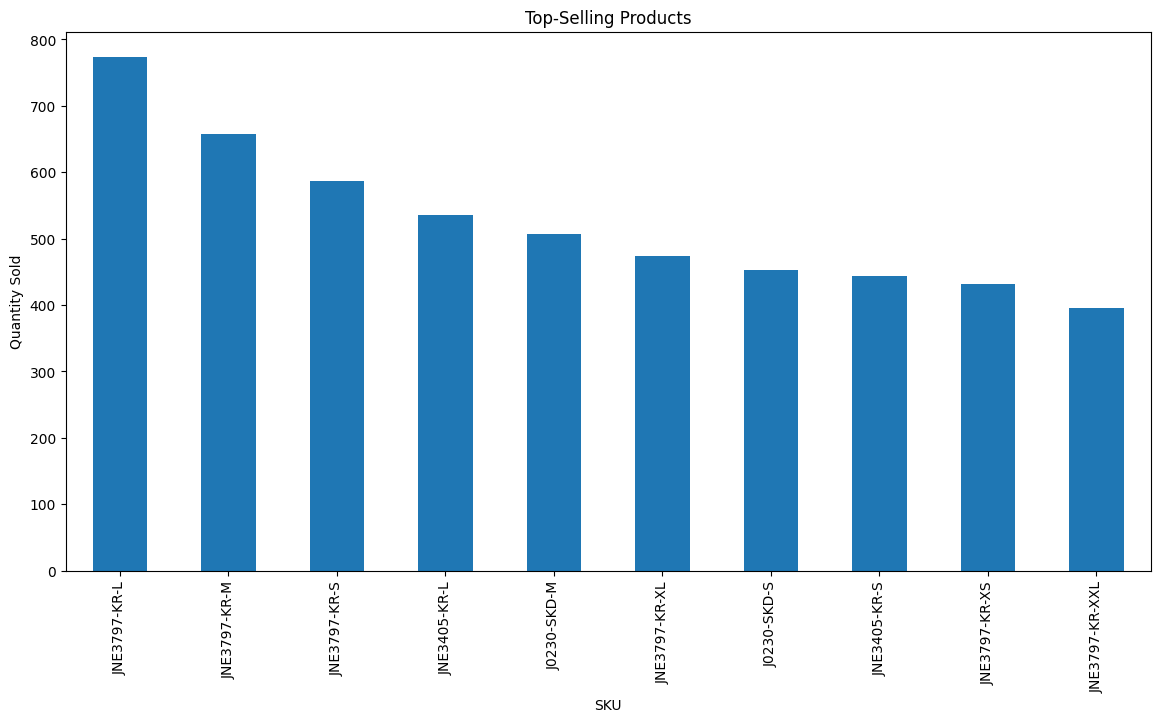

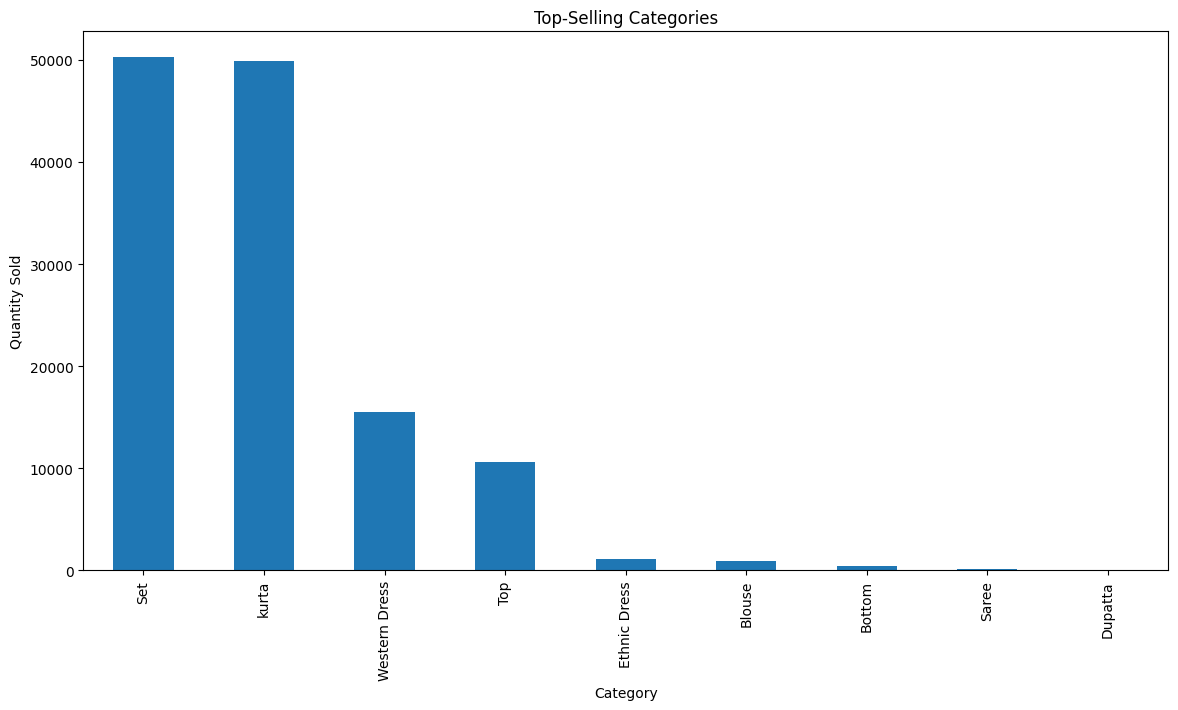

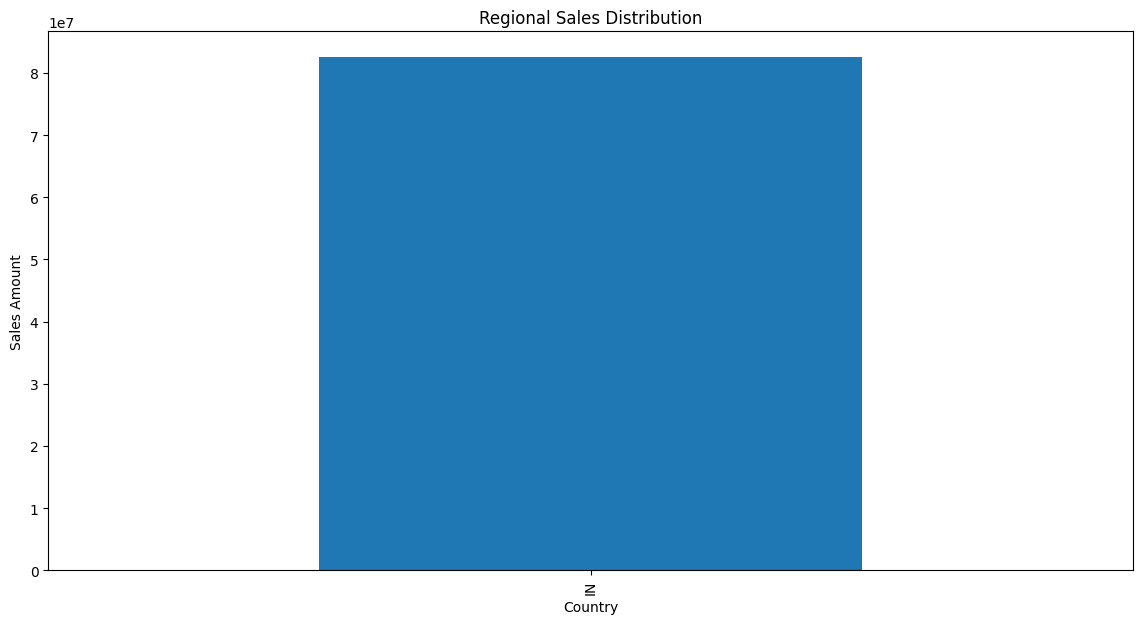

In [71]:
from ctypes import DEFAULT_MODE

# Sales trends over time
df.set_index('Date', inplace=True)
monthly_sales = df.resample('M').sum()['Amount']

plt.figure(figsize=(14, 7))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.show()

# Top-selling products and categories
top_products = df.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
top_products.plot(kind='bar')
plt.title('Top-Selling Products')
plt.xlabel('SKU')
plt.ylabel('Quantity Sold')
plt.show()

top_categories =df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
top_categories.plot(kind='bar')
plt.title('Top-Selling Categories')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.show()

# Regional sales distributions
regional_sales = df.groupby('ship-country')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
regional_sales.plot(kind='bar')
plt.title('Regional Sales Distribution')
plt.xlabel('Country')
plt.ylabel('Sales Amount')
plt.show()




In [72]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

# Feature Selection
features = ['Qty', 'Amount']
X = df[features]
y = df['Status']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [73]:


# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Model Prediction
y_pred_lr = lr.predict(X_test)

# Model Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Cross-validation
cv_scores_lr = cross_val_score(lr, X, y, cv=5)
print("Cross-validation scores:", cv_scores_lr)
print("Mean CV score:", cv_scores_lr.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/l

Logistic Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5502
           1       0.00      0.00      0.00       185
           2       0.00      0.00      0.00        92
           3       0.60      1.00      0.75     23298
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00      8643
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00       304
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00       606
          11       0.00      0.00      0.00        46
          12       0.00      0.00      0.00         3

    accuracy                           0.60     38693
   macro avg       0.05      0.08      0.06     38693
weighted avg       0.36      0.60      0.45     38693

Accuracy: 0.6021244152689117


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Cross-validation scores: [0.60321768 0.60325645 0.60325645 0.60325645 0.60325645]
Mean CV score: 0.6032486916069006


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [74]:


# Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Model Prediction
y_pred_dt = dt.predict(X_test)

# Model Evaluation
print("Decision Tree")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Cross-validation
cv_scores_dt = cross_val_score(dt, X, y, cv=5)
print("Cross-validation scores:", cv_scores_dt)
print("Mean CV score:", cv_scores_dt.mean())

Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      5502
           1       0.00      0.00      0.00       185
           2       0.00      0.00      0.00        92
           3       0.68      0.95      0.79     23298
           4       0.00      0.00      0.00         1
           5       0.45      0.11      0.18      8643
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00       304
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00       606
          11       0.00      0.00      0.00        46
          12       0.00      0.00      0.00         3

    accuracy                           0.69     38693
   macro avg       0.16      0.13      0.14     38693
weighted avg       0.65      0.69      0.63     38693

Accuracy: 0.6949318998268421


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Cross-validation scores: [0.68536538 0.64334173 0.67792208 0.66090328 0.68245784]
Mean CV score: 0.6699980616398526


In [62]:


# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Model Prediction
y_pred_rf = rf.predict(X_test)

# Model Evaluation
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Cross-validation
cv_scores_rf = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores_rf)
print("Mean CV score:", cv_scores_rf.mean())

Random Forest
              precision    recall  f1-score   support

           0       0.96      0.68      0.79      5502
           1       0.00      0.00      0.00       185
           2       0.00      0.00      0.00        92
           3       0.68      0.95      0.79     23298
           4       0.00      0.00      0.00         1
           5       0.45      0.12      0.19      8643
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00       304
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00       606
          11       0.00      0.00      0.00        46
          12       0.00      0.00      0.00         3

    accuracy                           0.69     38693
   macro avg       0.16      0.13      0.14     38693
weighted avg       0.65      0.69      0.63     38693

Accuracy: 0.6947768330188923


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Cross-validation scores: [0.68497771 0.64070556 0.67780578 0.65981779 0.68117852]
Mean CV score: 0.6688970730761776


In [63]:


# Create Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Amazon Sales Report Dashboard"),

    dcc.Tabs([
        dcc.Tab(label='Overview', children=[
            html.Div([
                dcc.Graph(id='amount-distribution'),
                dcc.Graph(id='status-count')
            ])
        ]),
        dcc.Tab(label='Predictive Model', children=[
            html.Div([
                html.H3("Model Accuracy:"),
                html.Div(id='model-accuracy'),
                dcc.Graph(id='feature-importance')
            ])
        ])
    ])
])

# Callbacks
@app.callback(
    Output('amount-distribution', 'figure'),
    Output('status-count', 'figure'),
    Output('model-accuracy', 'children'),
    Output('feature-importance', 'figure'),
    Input('amount-distribution', 'id')
)
def update_graphs(_):
    # Distribution of Amount
    fig_amount = px.histogram(df, x='Amount', nbins=50, title='Distribution of Amount')

    # Order Status Count
    fig_status = px.bar(df['Status'].value_counts(), title='Order Status Count')

    # Predictive Model Evaluation
    X = df[features]
    y = df['Status']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = f"Accuracy: {accuracy_score(y_test, y_pred):.2f}"

    # Feature Importance
    feature_importance = rf.feature_importances_
    fig_importance = px.bar(x=features, y=feature_importance, title='Feature Importance')

    return fig_amount, fig_status, accuracy, fig_importance

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)



<IPython.core.display.Javascript object>